# Exercise 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

## Exercise 2.1

Here we want to calculate the value of a 1 dimensional integral using first random number sampled from a uniform distribution, then from a distribution which is closer to the function we are integrating

First we load the data from the evaluation using uniform distribution sampling

In [3]:
x, I_est_uniform, I_err_uniform = np.loadtxt("I_mc_uniform.dat", unpack = True) 

then from a non uniform distribution

In [4]:
x, I_est_nonuniform, I_err_nonuniform = np.loadtxt("I_mc_nonuniform.dat", unpack = True) 

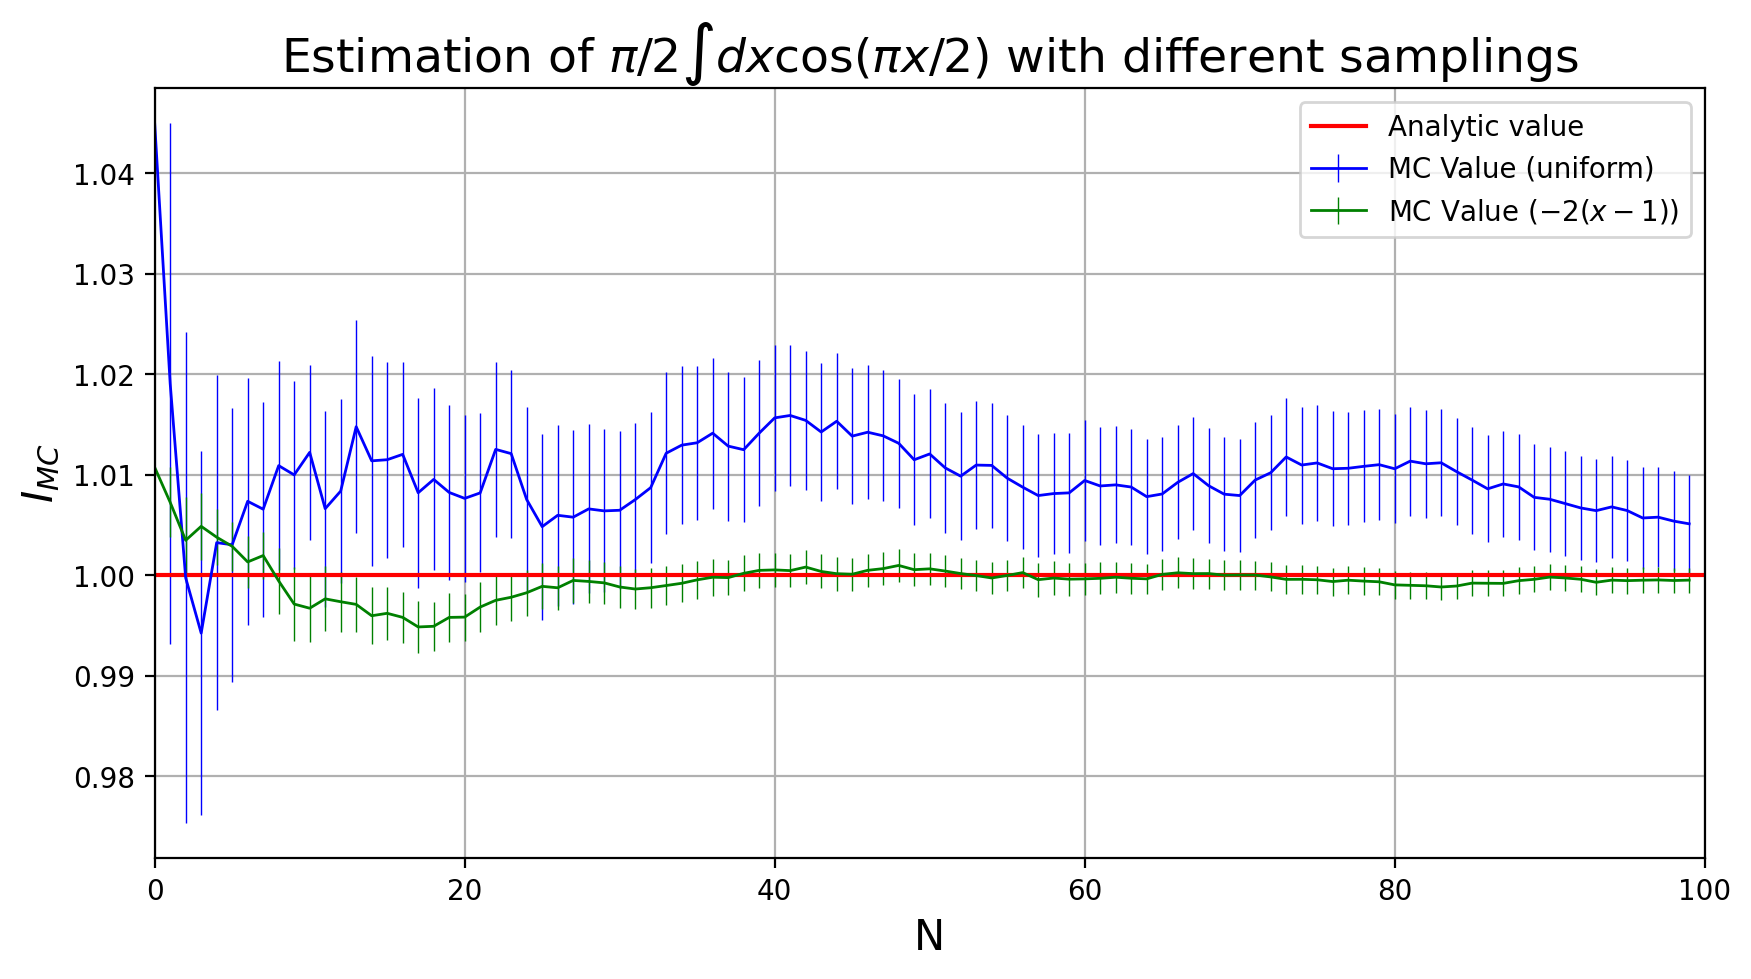

In [5]:
plt.figure(figsize = (10,5), dpi = 200)
plt.errorbar(x, I_est_uniform, I_err_uniform, label = "MC Value (uniform)", color = "blue", linewidth = 1, elinewidth = 0.5)
plt.errorbar(x, I_est_nonuniform, I_err_nonuniform, label = r"MC Value ($-2(x - 1)$)", color = "green", linewidth = 1, elinewidth = 0.5)
plt.axhline(1., color = "red", label = "Analytic value", linewidth = 1.5)
plt.legend()
plt.xlim((0, 100))
plt.grid()
plt.title(r"Estimation of $\pi / 2 \int dx \cos(\pi x / 2)$ with different samplings", fontsize = 17)
plt.xlabel("N", fontsize = 15)
plt.ylabel(r"$I_{MC}$", fontsize = 15)
plt.savefig("Integral.png")

It can immediatly be seen that the evaluation of the integral using a non uniform distribution (even as simple as $-2(x - 1)$) converges more quickly and gives smaller uncertainties

## Exercise 2.2

Next exercise we simulated a random walk, where we decide the movement of a "walker" based on the output of a random number generator

### Discrete random walk
The first RW simulated is a discrete random walk, here we think of a walker confined to a cubic lattice, thus we have 6 possible movements: up, down, forward, back, left or right.

This is achieved by extracting an integer number in $[0,5]$, if the output is 0 the walker moves one step in the positive x direction, if the output is 1 the move is in the negatice x direction, 2 moves in the positive y and so on.



The result of one of the random walks simulated is shown below

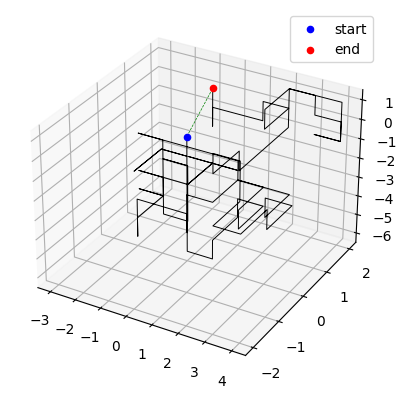

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.loadtxt("rw_discrete_points.dat", unpack = True)
ax.plot(x, y, z, c='k',linewidth=0.7)  # 'c' specifies the color, 'marker' specifies the marker style
ax.scatter(x[0],y[0],z[0], label = "start", c = "b")
ax.scatter(x[-1],y[-1],z[-1], label = "end", c = "r")
ax.plot([x[0], x[-1]],[y[0], y[-1]],[z[0], z[-1]], "--", linewidth=0.5, c = "g")
ax.legend()

For the analysis we performed several such walks and computed for each step the distance squared from the origin and averaged it over the different walks in order to obtain the RMS as a function of the distance. The result was then fitted against a diffusion law of the form $d = k\sqrt{x}$

First we load the resualts form the simulation

In [36]:
sqrt_dist_d, err_d = np.loadtxt("output_rw_disc.dat", unpack = True)
x = np.arange(0, 100)

Then a function for the diffusion law is defined and then the results are fiftted with this function

In [37]:
def diffusion(x, k):
    return k * np.sqrt(x)

In [38]:
k_d = curve_fit(diffusion, x, sqrt_dist)[0][0]

In [47]:
print("diffusion constant = {:.4f}".format(k_d))

diffusion constant = 0.9917


Below a plot of the points is shown with the errors and a plot of the fitted function

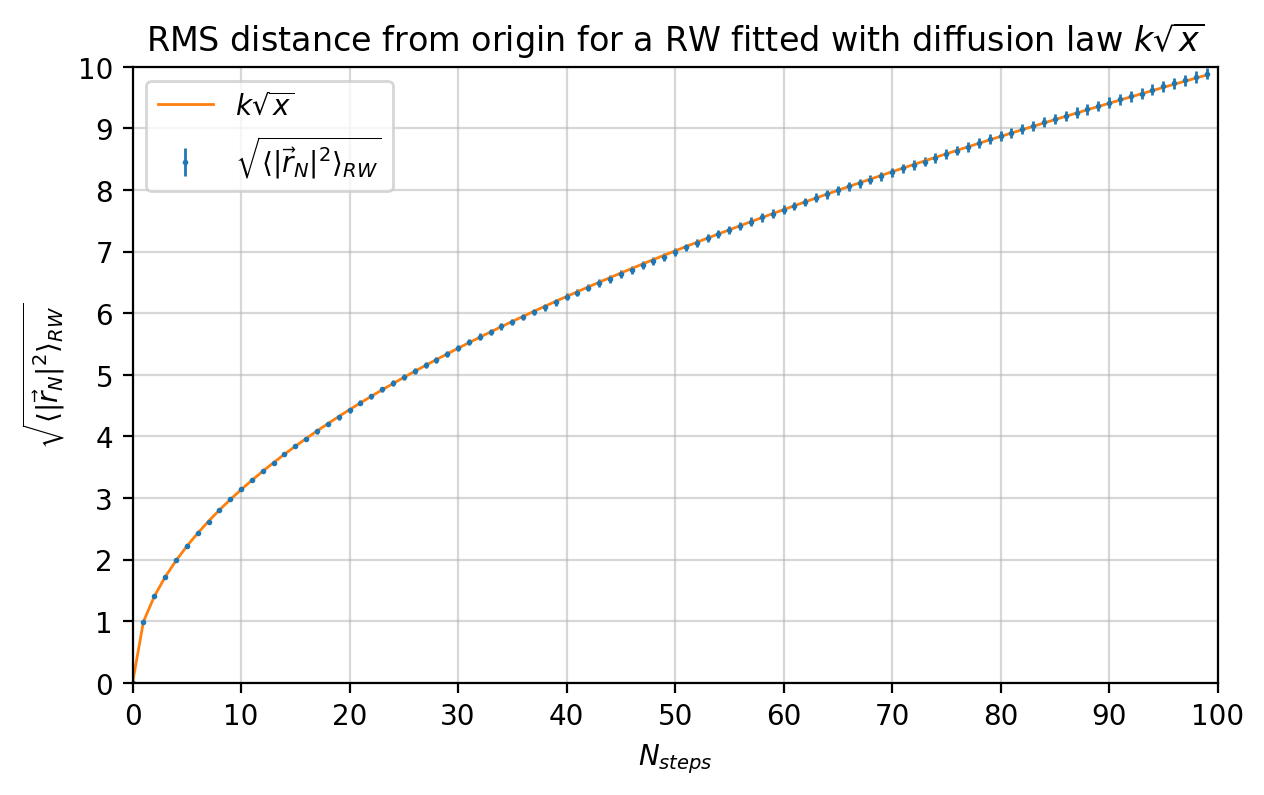

In [39]:
plt.figure(figsize = (7, 4), dpi = 200)
plt.errorbar(x, sqrt_dist_d, err_d, linewidth = 0, elinewidth = 1, marker = "o", markersize = 1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.plot(x, diffusion(x, k_d), linewidth = 1, label = r"$k\sqrt{ x }$")
plt.grid(alpha = .5)
plt.xlim((0,100))
plt.ylim((0, 10))
plt.xlabel(r"$N_{steps}$")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.title("RMS distance from origin for a RW fitted with diffusion law $k\sqrt{x}$")
plt.xticks(np.arange(0,110, 10))
plt.yticks(np.arange(0,11))
plt.legend()
plt.savefig("susrw.png")

In [35]:
k

0.9916924030338562

### Continuosus Random Walk
Next we performed a continuos random walk, here the only restriction on the movement was the lenght of the step, set to unity, the walker we "free" to choose the step direction in all thre dimensions based on the sampling of a unit length vector on a sphere. Here an angle $\theta$ between $[0, \pi]$, and an angle $\phi$ between $[0, 2\pi]$ were sampled, based on the result of such sampling a displacement vector was calculated as:
$$
\begin{pmatrix} dx \\ dy \\ dz \end{pmatrix}  = \begin{pmatrix} \sin(\theta) \cdot \cos(\phi) \\ \sin(\theta) \cdot \sin(\phi) \\ \cos(\theta) \end{pmatrix}
$$
We show below the results of one ot the walks

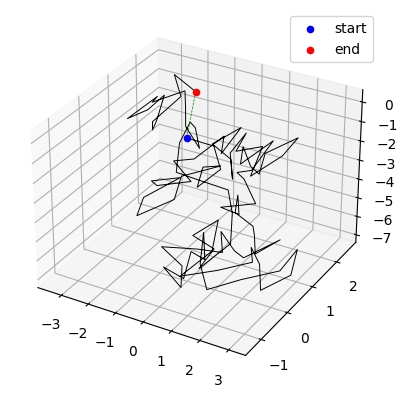

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.loadtxt("rw_continue_points.dat", unpack = True)
ax.plot(x, y, z, c='k',linewidth=0.7)  # 'c' specifies the color, 'marker' specifies the marker style
ax.scatter(x[0],y[0],z[0], label = "start", c = "b")
ax.scatter(x[-1],y[-1],z[-1], label = "end", c = "r")
ax.plot([x[0], x[-1]],[y[0], y[-1]],[z[0], z[-1]], "--", linewidth=0.5, c = "g")
ax.legend()

Then the same analysis done for the discrete random walk was repeated for the continuos one, showing the same diffusive beahaviour

In [42]:
sqrt_dist, err = np.loadtxt("rw_continue_distance.dat", unpack = True)
x = np.arange(0, 100)

In [46]:
k = curve_fit(diffusion, x, sqrt_dist)[0][0]
print("Diffusion coefficient = {:.4f}".format(k))

Diffusion coefficient = 0.9937


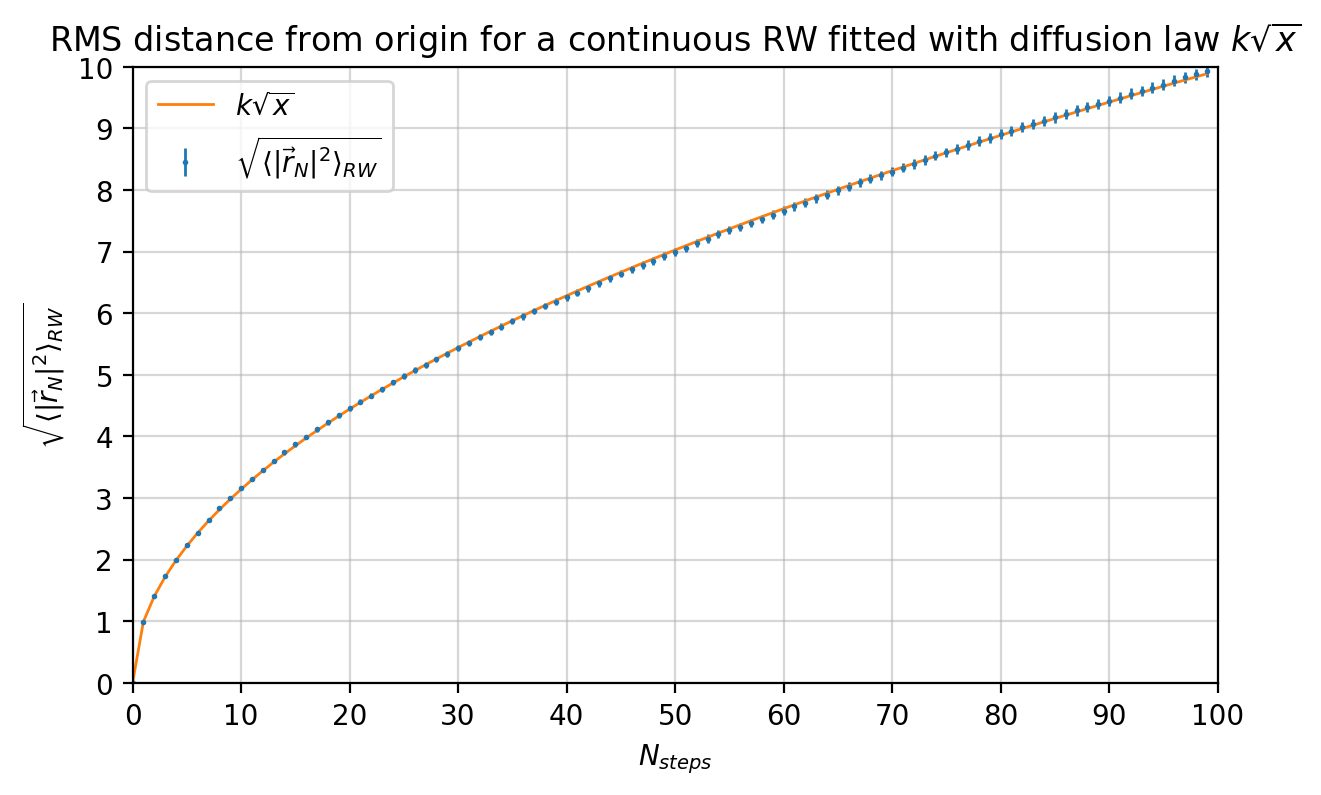

In [45]:
plt.figure(figsize = (7, 4), dpi = 200)
plt.errorbar(x, sqrt_dist, err, linewidth = 0, elinewidth = 1, marker = "o", markersize = 1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.plot(x, diffusion(x, k), linewidth = 1, label = r"$k\sqrt{ x }$")
plt.grid(alpha = .5)
plt.xlim((0,100))
plt.ylim((0, 10))
plt.xlabel(r"$N_{steps}$")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.title("RMS distance from origin for a continuous RW fitted with diffusion law $k\sqrt{x}$")
plt.xticks(np.arange(0,110, 10))
plt.yticks(np.arange(0,11))
plt.legend()
plt.savefig("susrw.png")

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 4.000e+00, 3.200e+01, 9.341e+03, 5.640e+02,
        2.000e+01, 9.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-20726.17500751, -20132.50074876, -19538.82649001, -18945.15223126,
        -18351.4779725 , -17757.80371375, -17164.129455  , -16570.45519625,
        -15976.7809375 , -15383.10667875, -14789.43242   , -14195.75816124,
        -13602.08390249, -13008.40964374, -12414.73538499, -11821.06112624,
        -11227.38686749, -10633.71260874, -10040.03834998,  -9446.364091

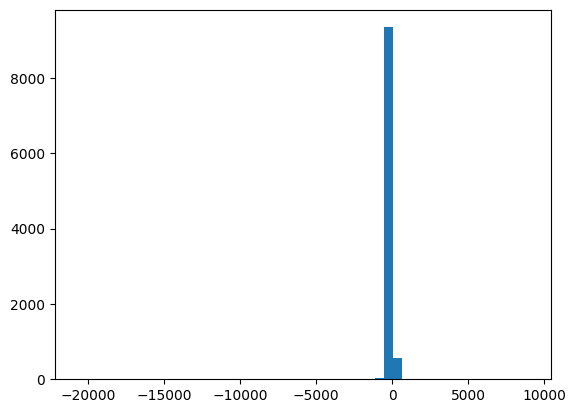

In [58]:
import numpy as np

# Parameters of the Levy distribution
mu = 0  # Mean
c = 10   # Scaling factor (adjust as needed)

# Number of samples
num_samples = 10000

# Generate random samples from the Levy distribution
levy_samples = np.random.standard_cauchy(num_samples) * c + mu

plt.hist(levy_samples, 50)